# **Solar Data Discovery** 

## **Benin Data Profiling, Cleaning, and EDA**

In [1]:
# Import Required Libraries   
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import zscore

In [15]:
# Reading DataSets 
benin_data = pd.read_csv("../data/benin-malanville.csv", parse_dates=['Timestamp'])

### Data Profiling

In [4]:
# display the first 10 records
benin_data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


In [5]:
# display the last 10 records 
benin_data.tail(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525590,2022-08-08 23:51:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.6,1.3,0.6,95.9,6.2,996,0,0.0,23.4,22.8,NaN
525591,2022-08-08 23:52:00,-5.5,0.0,-5.8,0.0,0.0,23.1,98.3,0.4,1.1,0.5,94.0,2.5,996,0,0.0,23.4,22.8,NaN
525592,2022-08-08 23:53:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.3,1.1,0.5,103.5,1.9,996,0,0.0,23.5,22.9,NaN
525593,2022-08-08 23:54:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.4,0.1,1.1,0.3,94.3,1.5,996,0,0.0,23.5,22.9,NaN
525594,2022-08-08 23:55:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.1,1.1,0.3,112.2,0.7,996,0,0.0,23.5,22.9,NaN
525595,2022-08-08 23:56:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [14]:
# display the shape of the data to get info about number features and instance 
print(f"Togo Solar data Information: ")
print(f"Instances: {benin_data.shape[0]} records ")
print(f"Features:  {benin_data.shape[1] } columns")

Togo Solar data Information: 
Instances: 525600 records 
Features:  18 columns


In [6]:
# Dataset information about type of each columns, size 
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [7]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': benin_data.columns,
    '# of unique': benin_data.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8609
DNI,DNI,8905
DHI,DHI,6995
ModA,ModA,10755
ModB,ModB,8461
Tamb,Tamb,329
RH,RH,980
WS,WS,164
WSgust,WSgust,92


In [8]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {benin_data.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in benin_data.columns: #
    percent =(benin_data[col].isna().sum()/benin_data.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")




                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 
Missing Values of column Comments: -> 100.0 %


In [13]:
# Number of missing values for each features 
no_missing = pd.DataFrame({
    '# missing': benin_data.isna().sum(), 
    '% missing': benin_data.isna().mean()*100
})
no_missing

,# missing,% missing
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [16]:
# After getting number of missing values feature "comment" is dropped 
benin_data.drop(['Comments'], axis=1, inplace=True)  # drop comments column

In [17]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {benin_data.duplicated().sum()}".center(150)) # used to display the number of duplicated values in the dataset
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        
                                                    Number of Duplicated values in the dataset: 0                                                     


In [18]:
# finding incorrect entries from the dataset     
negative_values = pd.DataFrame({
    'num of -ve values': benin_data.select_dtypes(include='number').lt(0).sum(), # counting the number of negative values in the dataset
    "% of -ve values": round(benin_data.select_dtypes(include='number').lt(0).mean() *100, 2), # percentage of negative values
})

negative_values

,num of -ve values,% of -ve values
GHI,258847,49.25
DNI,275987,52.51
DHI,259182,49.31
ModA,0,0.00
ModB,0,0.00
Tamb,0,0.00
RH,0,0.00
WS,0,0.00
WSgust,0,0.00
WSstdev,0,0.00


In [20]:
radiation_cols = ['GHI', 'DNI', 'DHI'] # List of columns to replace negative values with 0
benin_data[radiation_cols] = benin_data[radiation_cols].clip(lower=0) # Replace negative values with 0

In [21]:
benin_data.describe() # print summary statistics of the data

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,241.958821,167.441866,116.993033,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
min,2021-08-09 00:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,2021-11-08 06:00:45,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000
std,NaN,330.101787,261.547532,157.463619,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743


- The above data profiling outputs describes:
  - The dataset one columns with missing values of all records
  -  There is no duplicated record in the dataset
  -  The Dataset contains 19 features and 525600 records
  -  The Dataset contains `16 float type` columns, `2 int type features` and `1 date and time feature`
  -  Dataset has one features with complete missing values. feature is called `comments` and all other features have no missing values 
  -  The data set contains incorrect feature inputs for `GHI, DNI anf DHI features`   

In [ ]:
# checking statistical summary of the dataset for only selected features
benin_data[['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']].describe()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,231.718786,151.258469,116.444352,226.144375,219.568588,2.368093,3.229490
std,321.691953,250.956962,156.520714,317.346938,307.932510,1.462668,1.882565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,1.900000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,2.200000,2.900000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,3.200000,4.400000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,16.100000,23.100000


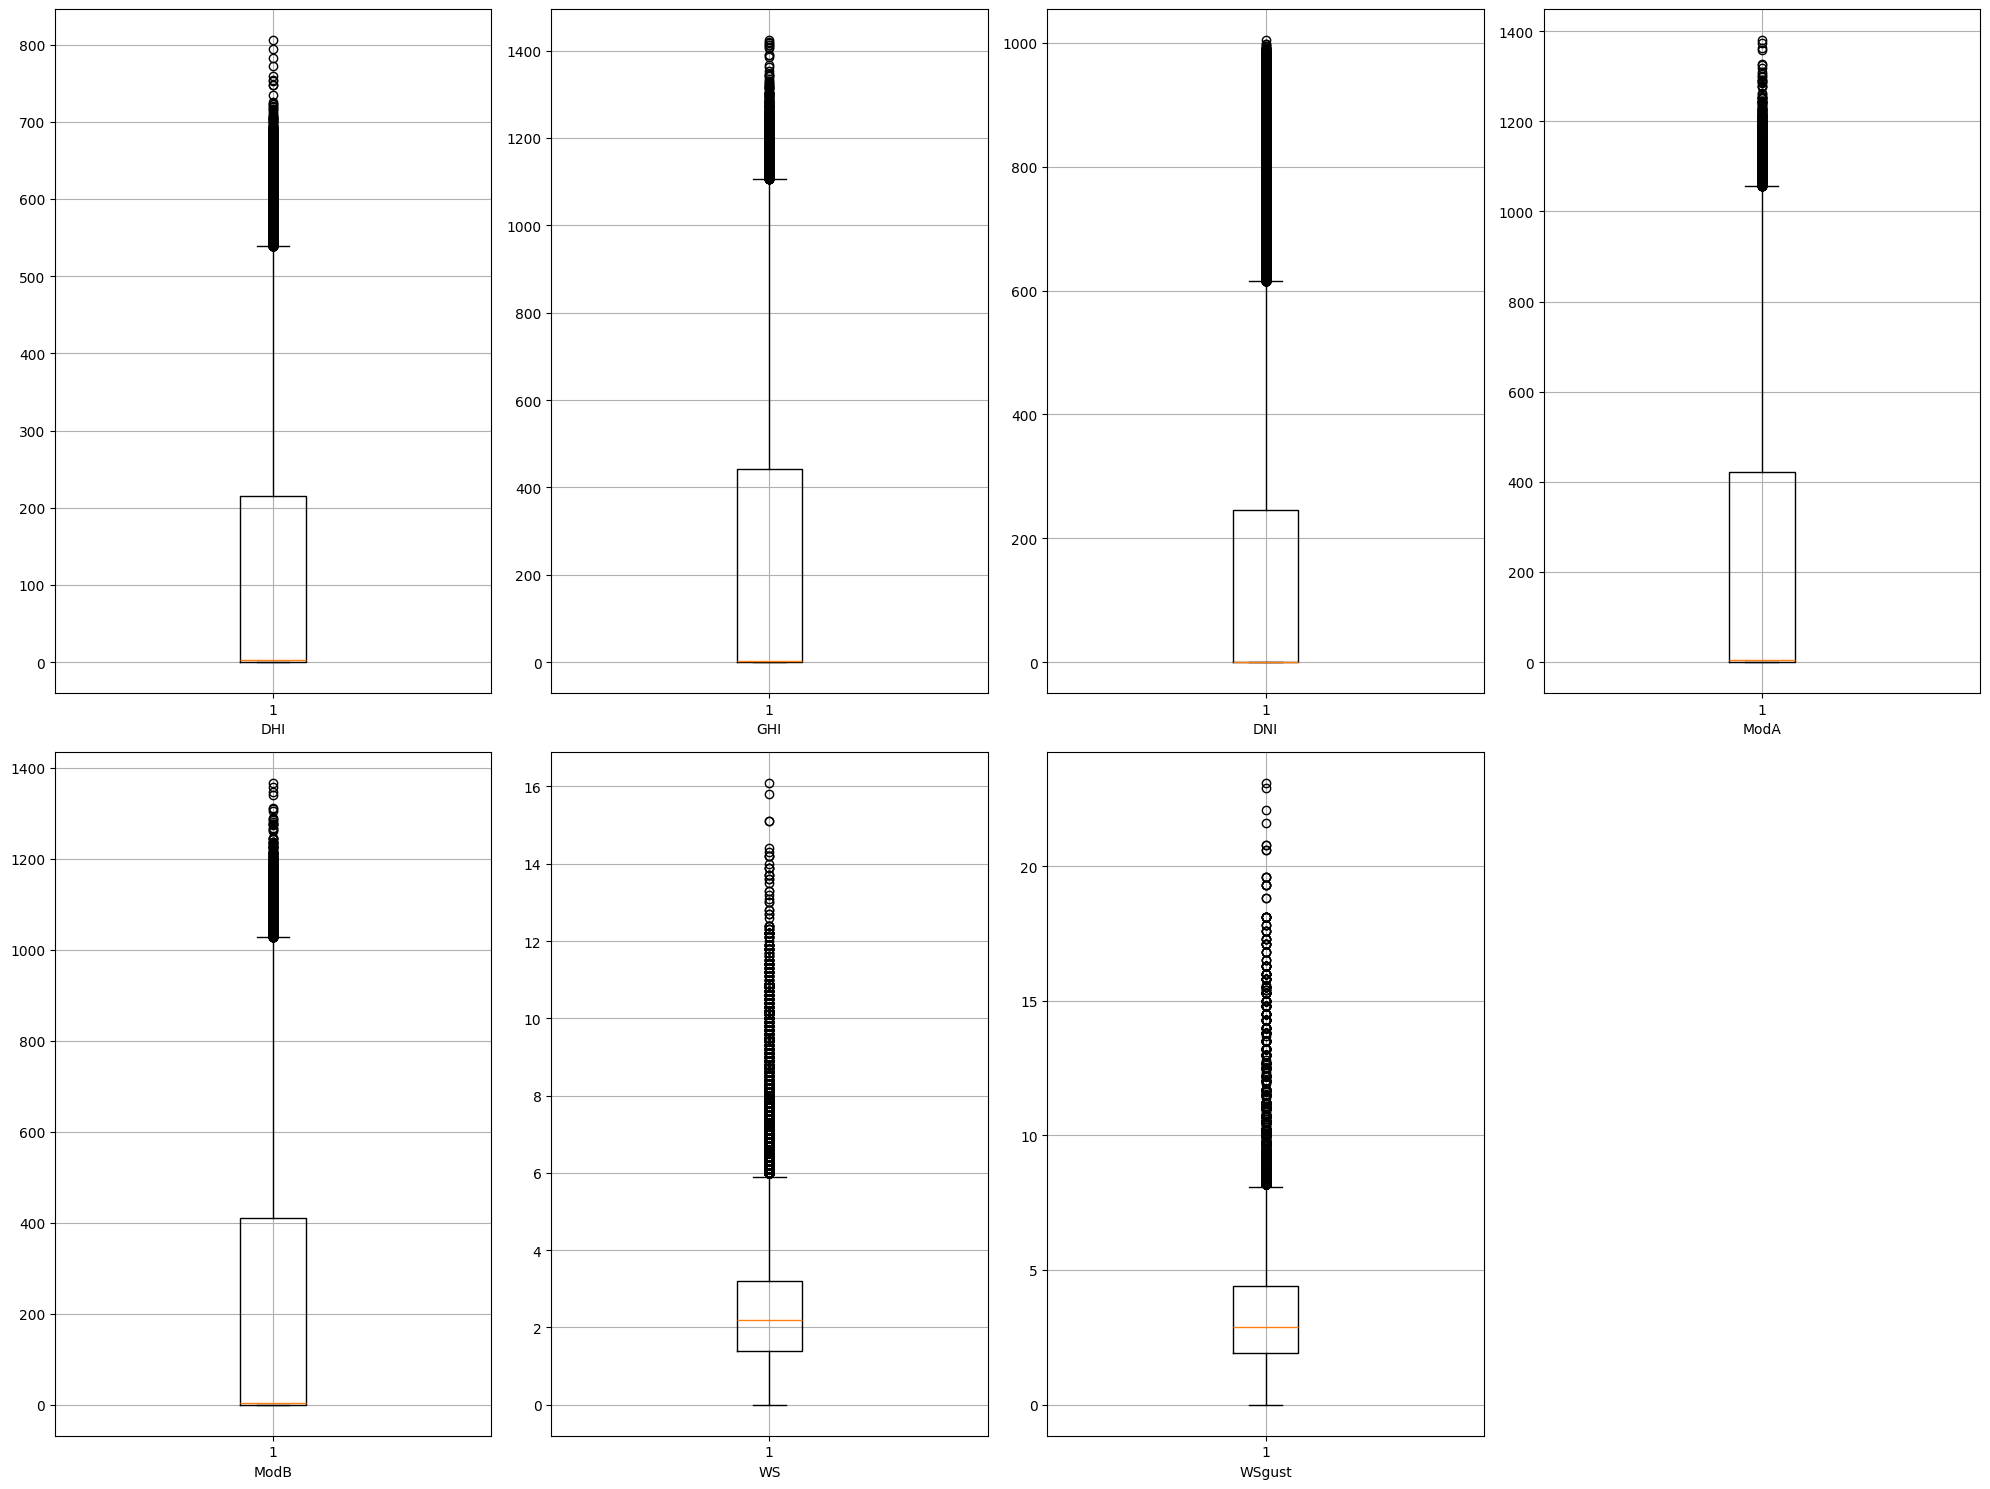

In [ ]:
# checking for outliers for Modb, and ModA, WS, WSgust using boxplot
cols = ['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols, start = 1):
    plt.subplot(2,4,i)
    plt.boxplot(benin_data[col])
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()
    

In [ ]:
# Finding Outlier Using interquartile Range (IQR) method for the following features
# GHI, DNI, DHI, ModA, ModB, WS, WSgust

column = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

def IQR_outlier(columns):
    quantile1 = columns.quantile(0.25)
    quantile3 = columns.quantile(0.75)
    iqr = quantile3 - quantile1
    lowerbound = quantile1 - 1.5 * iqr 
    upperbound = quantile3 + 1.5 * iqr
    
    return (columns <lowerbound) | (columns>upperbound)

outlier = IQR_outlier(benin_data[column])

outlier = pd.DataFrame({
    'column':column,
    '# of outlier': IQR_outlier(benin_data[column]).sum(),
    '% of Outlier': round(IQR_outlier(benin_data[column]).mean() * 100,2),
})

outlier

,column,# of outlier,% of Outlier
GHI,GHI,1361,0.26
DNI,DNI,50586,9.62
DHI,DHI,7905,1.50
ModA,ModA,1237,0.24
ModB,ModB,1537,0.29
WS,WS,8708,1.66
WSgust,WSgust,7377,1.40


In [ ]:
# checking for outliers using zscore
def z_score_outlier(col):
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(benin_data[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust'])

cols = ['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
z_score_Outlier = pd.DataFrame({
    'column': cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier

,column,# of outlier,% of Outlier
0,DHI,3415,0.65
1,GHI,314,0.06
2,DNI,1062,0.20
3,ModA,137,0.03
4,ModB,206,0.04
5,WS,3510,0.67
6,WSgust,3915,0.74


In [ ]:
# Replace outliers with median
for col in cols:
    median_value = benin_data[col].median()
    benin_data.loc[outlier_z_score[col], col] = median_value

# Summary DataFrame
summary = pd.DataFrame({
    'column': cols,
    '# of Outliers': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outliers': [round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})

print(summary)

   column  # of Outliers  % of Outliers
0     DHI           3415           0.65
1     GHI            314           0.06
2     DNI           1062           0.20
3    ModA            137           0.03
4    ModB            206           0.04
5      WS           3510           0.67
6  WSgust           3915           0.74


In [ ]:
benin_data 

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56:00,0.0,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525596,2022-10-24 23:57:00,0.0,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525597,2022-10-24 23:58:00,0.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9
525598,2022-10-24 23:59:00,0.0,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8
